## Concrete Strength Prediction Using ANN ##

Regression is a type of supervised ML algorithm used to predict a continuous label. The goal is to produce a model that represent the best fit to some observed data, according to an evaluation criterion.  

**Problem Statement-**  

In this analysis, you will be predicting the strength of concrete using the given eight features that describe the component used in the mixture. These features are believed to be related to the final conpressive strength which include the amount of cement in Kilograms pre cubic meter, Blast.Furnace.Slag, Fly.Ash, water, superplasticizer, coarse aggregate, fine aggregate and aging period measure in days.

#### Importing Libraries ####

In [3]:
import pandas as pd
import numpy as np

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

#removing the warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Load the dataset ###

In [5]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\2. Regression using ANN-20250309T053444Z-001\2. Regression using ANN\concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.shape

(1030, 9)

In [7]:
df.describe

<bound method NDFrame.describe of       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


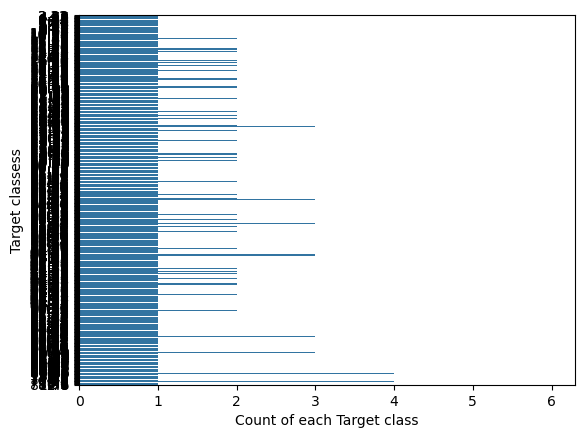

In [10]:
sns.countplot(y=df.Strength, data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classess")
plt.show()

### Data Pre-processing ###

In [12]:
X=df.iloc[:,0:-1].values
Y=df.iloc[:,-1].values

In [13]:
Y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [14]:
#splitting the data into train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
#create a model
lr=LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [17]:
Y_pred

array([40.24884682, 13.77097415, 60.68915646, 53.92788552, 23.70609615,
       53.10401888, 45.33940418, 26.79528221, 53.30151426, 37.03393094,
       16.27408353, 38.37015218, 29.6591941 , 35.00203018, 48.28738299,
       56.73892749, 35.29364647, 29.10484279, 48.95356698, 35.32372519,
       53.74067993, 31.39296781, 32.44848488, 48.51975923, 23.51942345,
       23.27124066, 69.47948622, 26.21473738, 56.73892749, 47.3103382 ,
       18.51138701, 36.35633549, 17.03560457, 19.95128957, 24.54430579,
       14.79689206, 52.67021113, 27.70694025, 26.50150896, 25.85880366,
       53.05005568, 30.27646584, 26.1483987 , 35.09595688, 53.2748847 ,
       54.06341192, 30.63335527, 44.71376623, 28.06389617, 55.90164595,
       36.08756568, 19.28183179, 23.37848511, 34.43107938, 42.90449643,
       48.14466457, 35.21920648, 53.26179103, 59.81136464, 36.56013739,
       31.16118587, 20.90557023, 50.74980393, 55.18681549, 20.22533613,
       43.37368967, 33.25220503, 33.85842777, 19.05272012, 19.93

In [23]:
def create_distplot(dataset, columns, rows, cols, title):
    """
    Objective: Create Distrubitions of all variables 
    
    Params:
    --------
        dataset: input pandas dataset
        columns: list, all columns list
        rows: how many number of rows we want to plot
        cols: how many number of cols we want to plot
        tittle:  name for all the plots
        
    Returns:
    
    """
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(title,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

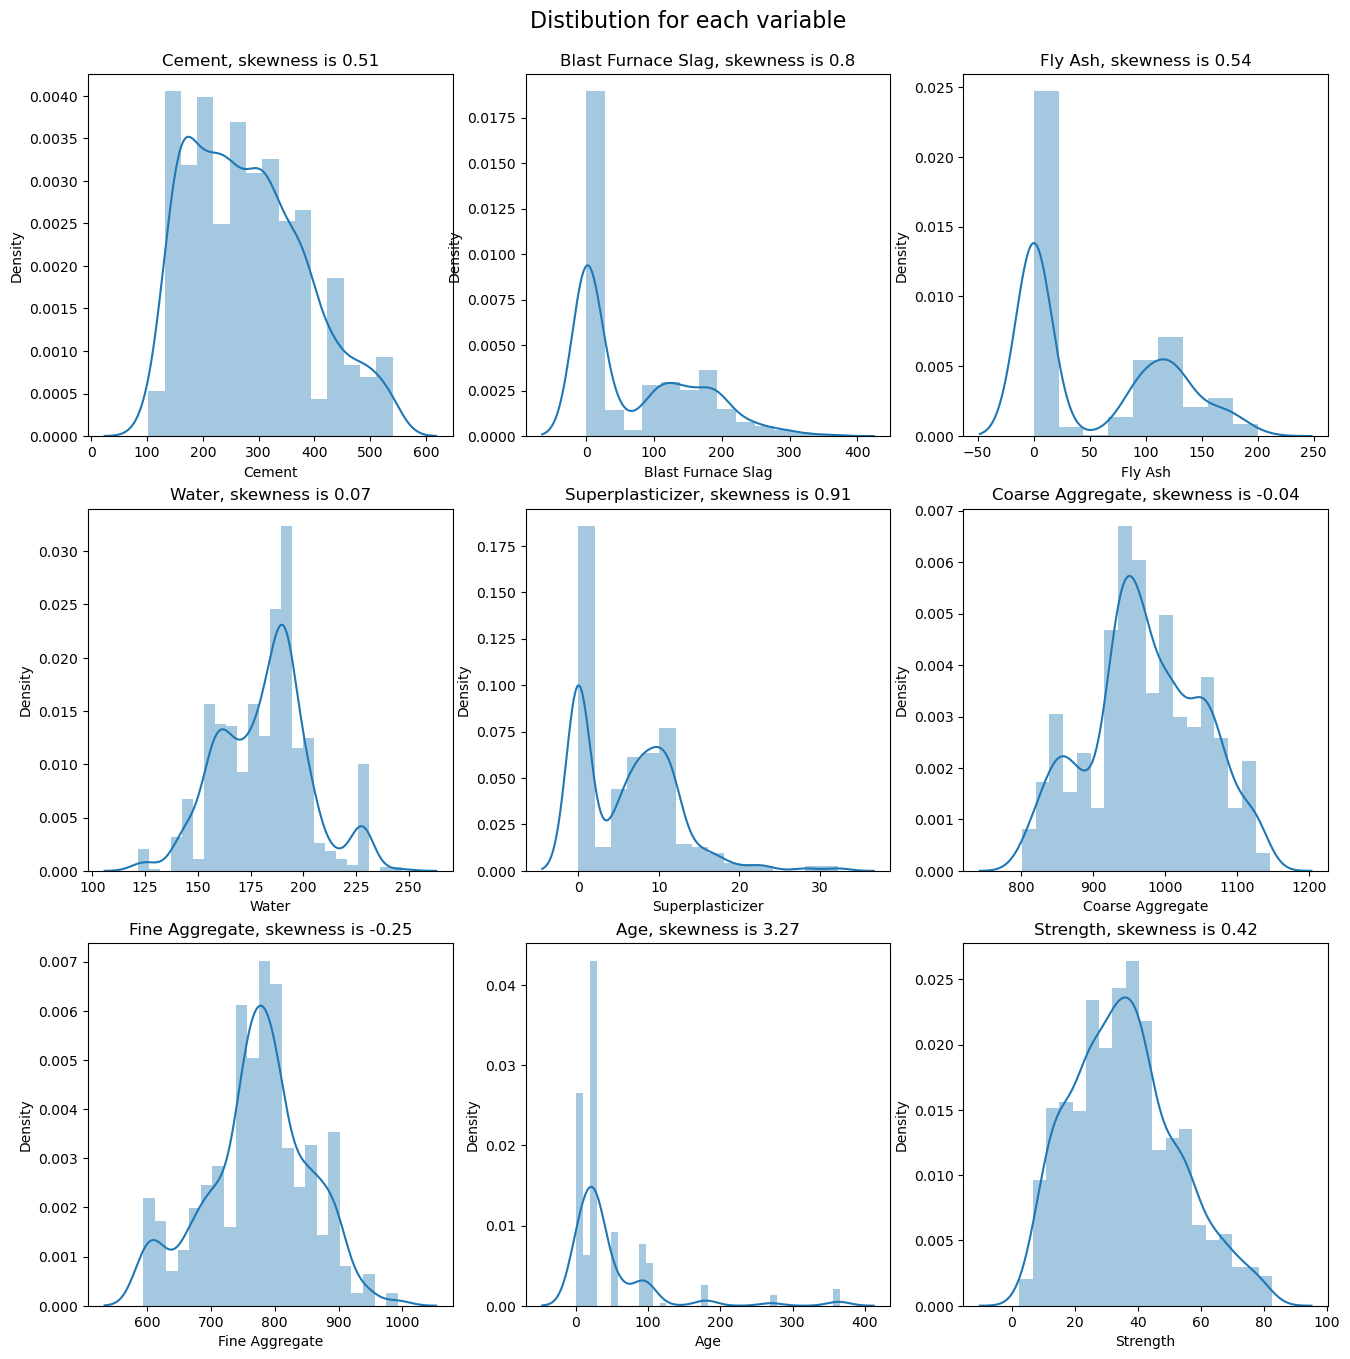

In [25]:
create_distplot(dataset=df, columns=df.columns, rows=3, cols=3, title='Distibution for each variable')

In [28]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

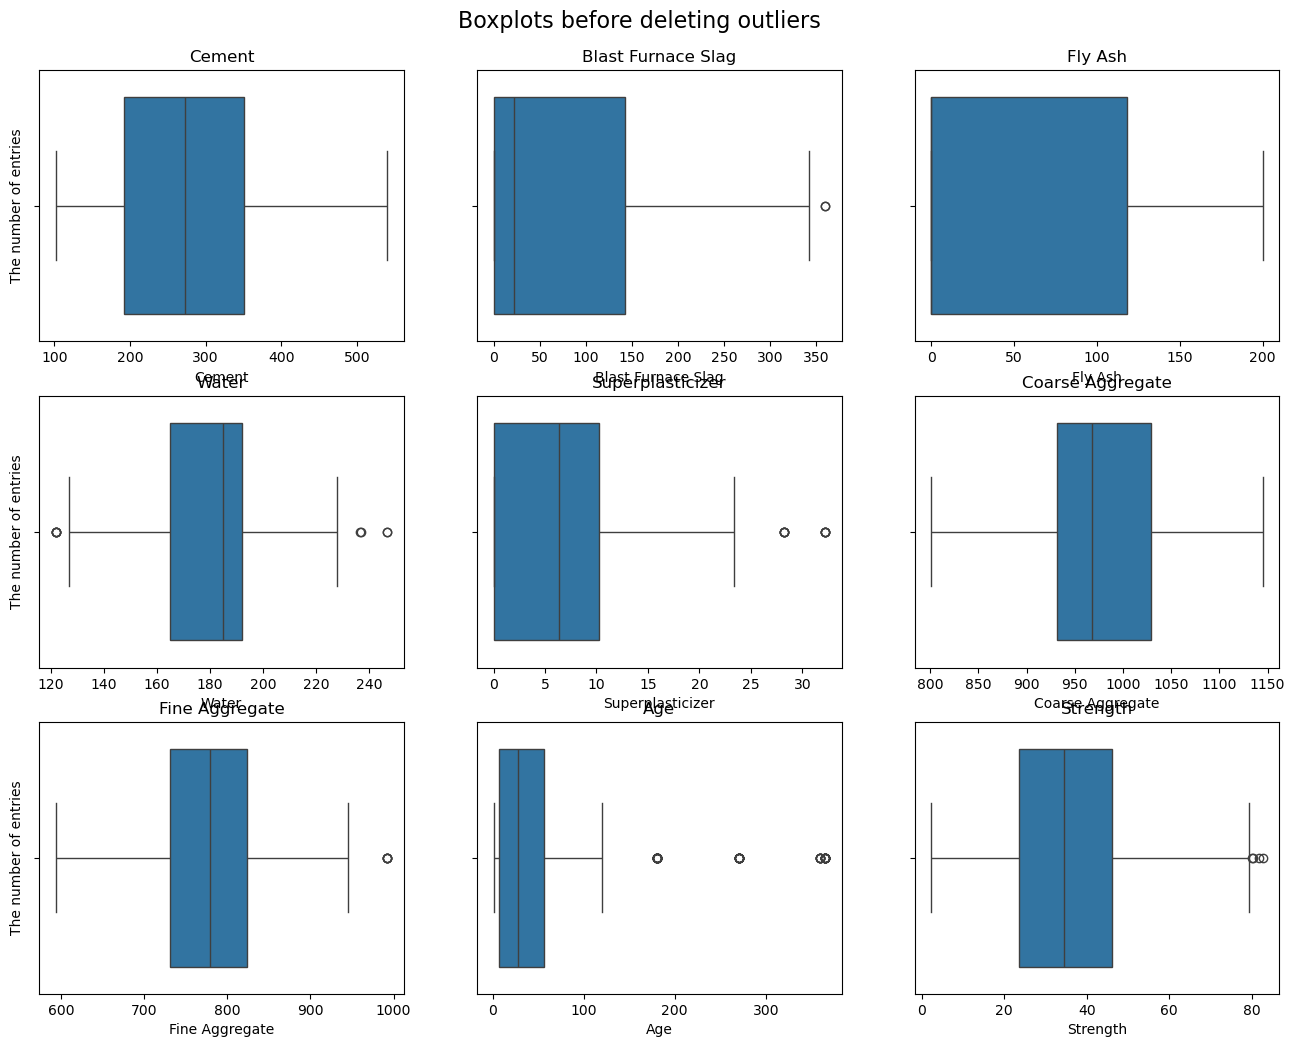

In [30]:
boxplots_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

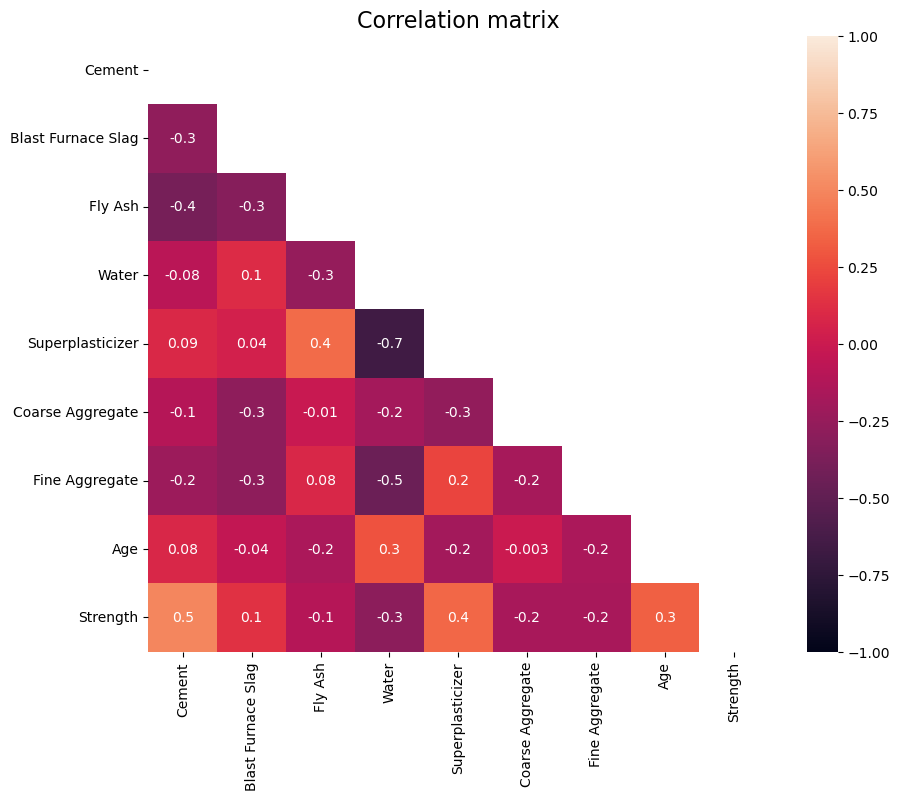

In [32]:
# calculating the correlation matrix
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

The pearsons correlation assumes normality, linearity, homoscedasticity and no outliers. These assumptions are violated for most variables. This may be a potential reason as to why pearsons correlation won't detect nuances between predictors and the independent variables properly. Additionally, the relationship between inputs does seem to be largely non-linear. Nonetheless, cement, water, and superplastisizer do seem to be moderately correlated with strength.

### Model Building using ANN ###

In [36]:
#sequential model to initialise our ANN and dense module to build the layers

model1 = Sequential()

#Adding the input layer and the firt hidden layer

model1.add(Dense(units = 1900, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

#Adding the second hidden layer 
model1.add(Dense(units = 1500, kernel_initializer = 'uniform', activation='relu'))

#Adding the third hidden layer 
model1.add(Dense(units = 1500, kernel_initializer = 'uniform', activation='relu'))

#Adding the third hidden layer 
model1.add(Dense(units = 2000, kernel_initializer = 'uniform', activation='relu'))

#Adding the output layer
model1.add(Dense(units = 1, kernel_initializer='uniform', activation='linear'))   #out data has binary classification hence in output there is only one preceptron.

In [38]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1900)                │          17,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1500)                │       2,851,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       2,251,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2000)                │       3,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,124,101 (30.99 MB)

 Trainable params: 8,124,101 (30.99 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#Compiling the ANN | means applying SGD on the whole ANN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

EPOCHS = 25
BATCH_SIZE = 64

#train_model
history = model1.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs= EPOCHS, validation_split=0.1, verbose = 1)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - loss: 1048.6344 - val_loss: 632.0770
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 355.8873 - val_loss: 322.9840
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 229.4251 - val_loss: 280.2142
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 221.4488 - val_loss: 223.6505
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 173.4623 - val_loss: 201.1030
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 155.5971 - val_loss: 187.2365
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 128.3615 - val_loss: 160.6855
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 108.6407 - val_loss: 126.9187
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 81.0731 - val_loss: 116.6697
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 76.7286 - val_loss: 92.9013
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 60.6196 - val_loss: 75.2982
Epoch 12/25


In [42]:
history_df = pd.DataFrame(history.history)

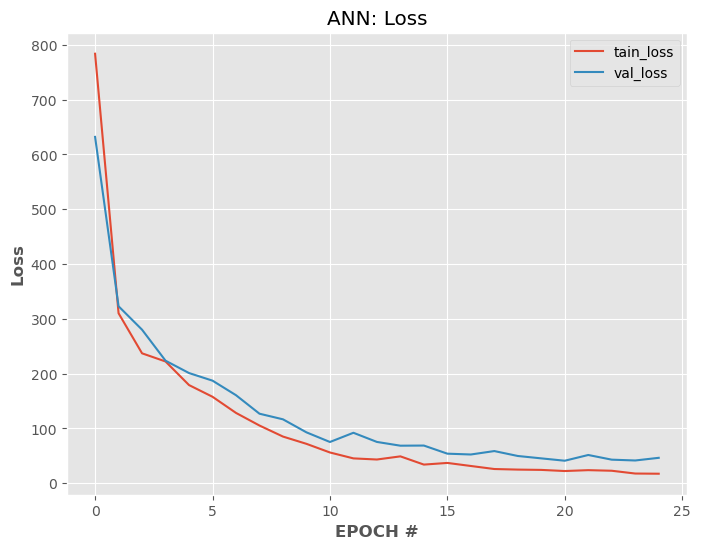

In [44]:
#plot the training and validation loss

N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [8,6])
plt.plot(N, history_df["loss"], label="tain_loss")
plt.plot(N, history_df["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("EPOCH #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
Y_pred = model1.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6245455682682399

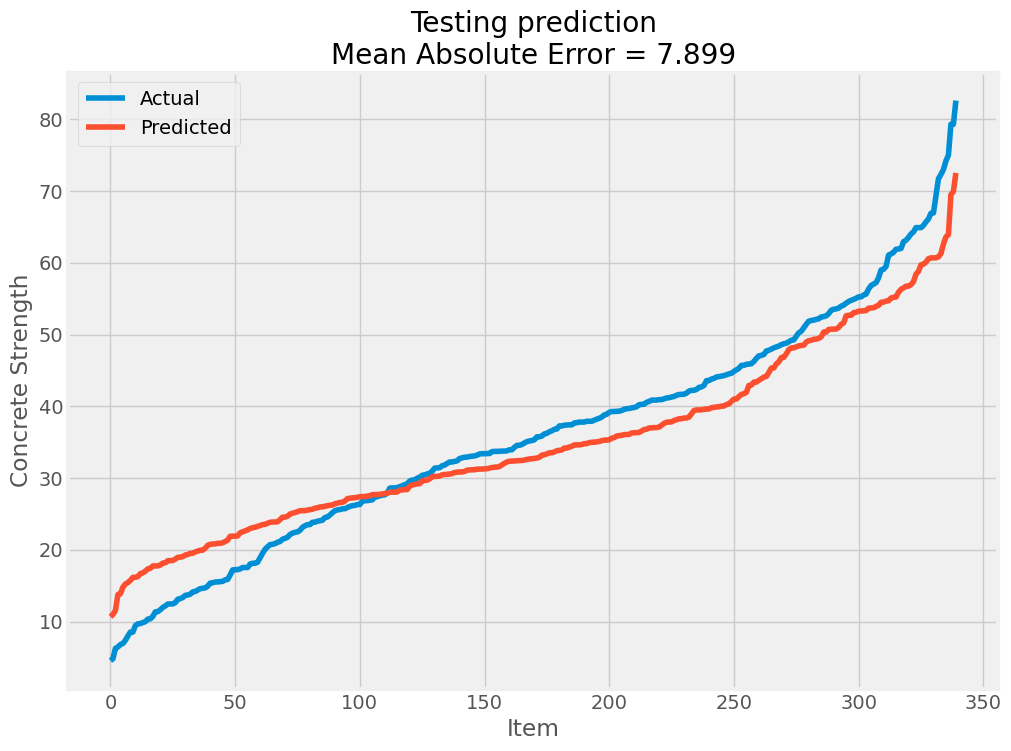

In [56]:
MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

### Model Finetuning 

### Improving with different archtitecture

In [69]:
from tensorflow import keras

In [71]:
model2 = keras.Sequential([
    Dense(40 , activation = 'relu' , input_shape = [X_train.shape[1]]),
    Dense(50 , activation = 'relu'),
    Dense(60 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

In [73]:
# summary of the model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 40)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,531 (21.61 KB)

 Trainable params: 5,531 (21.61 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model2.compile(optimizer='Adam', loss = 'mean_squared_error' , )

In [79]:
history = model2.fit(X_train, Y_train,batch_size=62 , epochs=100 , validation_split=.1,verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1486.4650 - val_loss: 1711.5585
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1497.7437 - val_loss: 1653.6431
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1393.1489 - val_loss: 1561.5242
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1346.3490 - val_loss: 1398.6251
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1119.8395 - val_loss: 1134.1322
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 902.7410 - val_loss: 765.0322
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 581.4448 - val_loss: 420.8313
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 281.3474 - val_loss: 299.5378
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 270.9906 - val_loss: 278.8743
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 238.7961 - val_loss: 255.0378
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 201.1017 - val_loss: 250.717

In [81]:
history_df = pd.DataFrame(history.history)

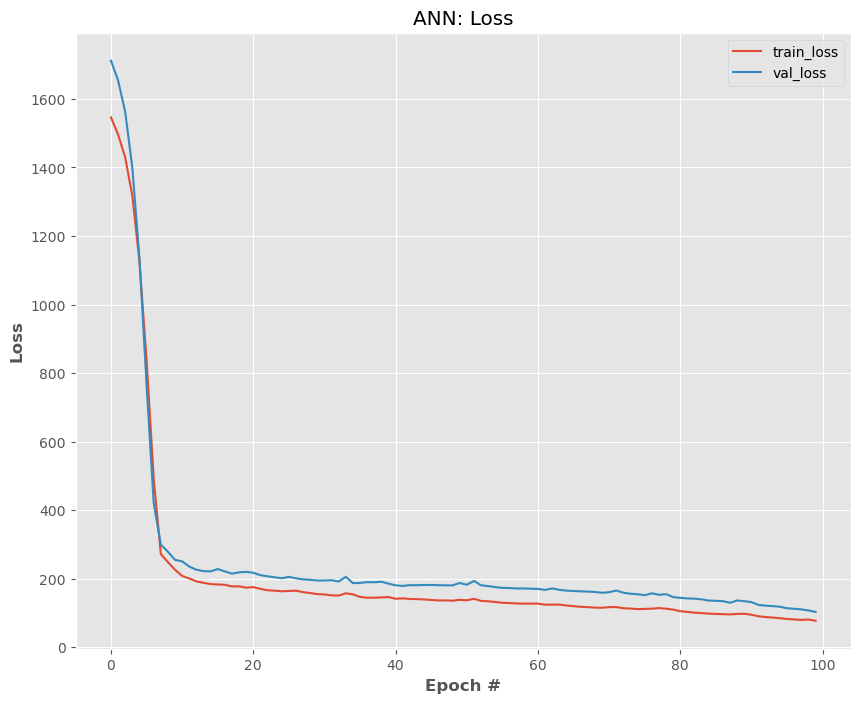

In [86]:
# plot the training and validation loss
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history_df["loss"], label="train_loss")
plt.plot(N, history_df["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

### Prediction on Unseen Data

In [89]:
Y_pred = model2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


### Model Evaluation

In [94]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.669008066128035

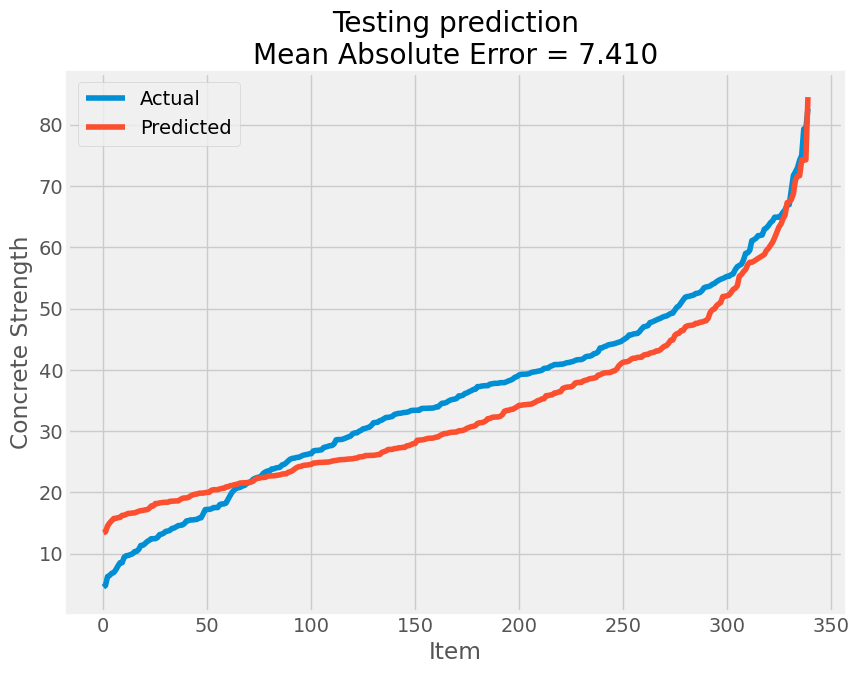

In [104]:
MAE = mae(Y_test, Y_pred)

plt.figure(figsize=(10,7))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

### Improving ANN with Dropout layer

In [142]:
from keras.layers import Dropout

In [144]:
model3 = keras.Sequential([
    Dense(30 , activation = 'relu' , input_shape = [X_train.shape[1]]),
    Dense(40 , activation = 'relu'),
    Dropout(rate = 0.1),
    Dense(50 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

In [146]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,611 (14.11 KB)

 Trainable params: 3,611 (14.11 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
# Compiling the ANN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model3.fit(X_train,Y_train,
                          batch_size=62 , 
                          epochs=100 , 
                          validation_split=0.1,
                          verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1501.5029 - val_loss: 1695.2612
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1450.0634 - val_loss: 1628.7195
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1391.0240 - val_loss: 1529.6510
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1284.9550 - val_loss: 1382.2452
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1168.3966 - val_loss: 1169.4318
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 945.1591 - val_loss: 895.9774
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 651.7202 - val_loss: 622.3582
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 500.1047 - val_loss: 416.8541
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 361.4433 - val_loss: 331.2958
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 303.7152 - val_loss: 296.6227
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 259.5526 - val_loss: 278.721

In [151]:
history_df = pd.DataFrame(history.history)

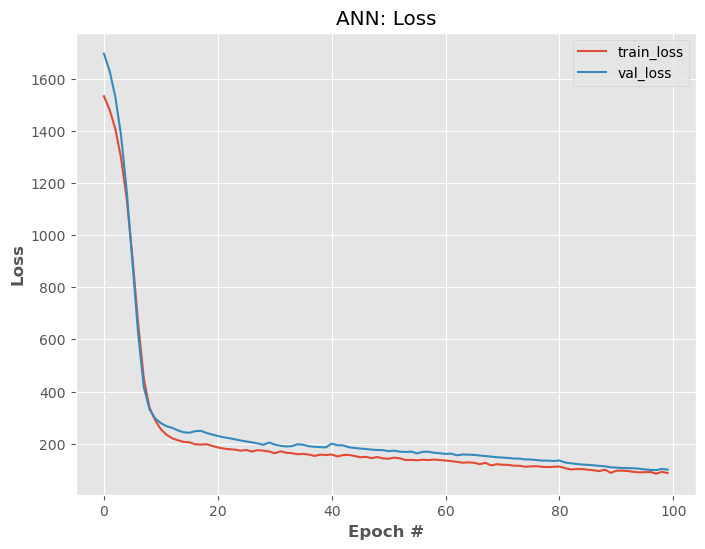

In [156]:
# plot the training and validation loss
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize = [8,6])
plt.plot(N, history_df["loss"], label="train_loss")
plt.plot(N, history_df["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [158]:
Y_pred = model3.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [160]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.6792994775498631

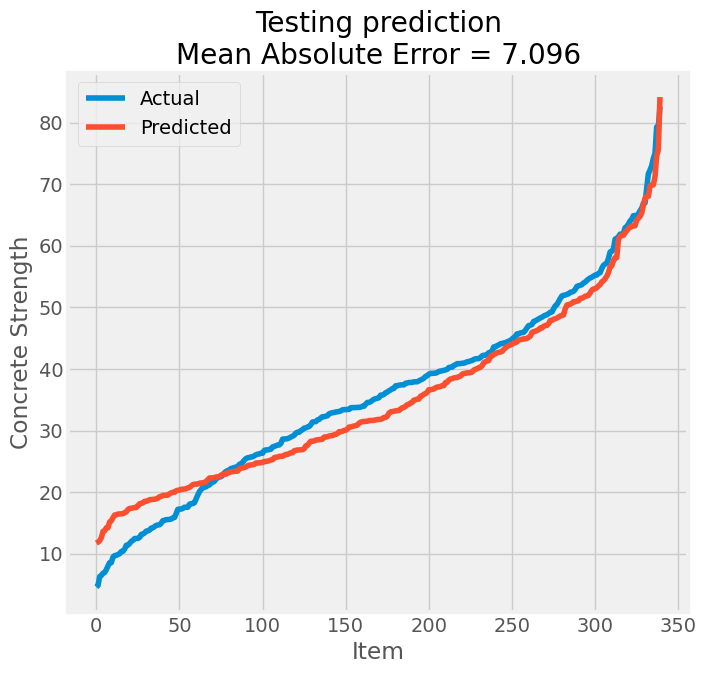

In [164]:
MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(8,7))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

## Conclusion ##  


We trained three ANN model using Different Fine Tuning Technique, from all the three models 2nd model is giving better performance so will select the second model for Deployment